# Модель брачного выбора на RLMS-HSE

## Подключение библиотеки

Здесь позже будет чисто подключение библиотеки, а не называание функций 

In [9]:
#Задействованные модули
import pandas as pd
import os
import numpy as np
# import matplotlib.pyplot as plt
# import statsmodels.formula.api as smf

In [10]:
#================================================================================================================
waves_dict={1994:[5,'A'],
           1995:[6,'B'],
           1996:[7,'C'],
           1998:[8,'D'],
           2000:[9,'E'],
           2001:[10,'F'],
           2002:[11,'G'],
           2003:[12,'H'],
           2004:[13,'I'],
           2005:[14,'J'],
           2006:[15,'K'],
           2007:[16,'L'],
           2008:[17,'M'],
           2009:[18,'N'],
           2010:[19,'O'],
           2011:[20,'P'],
           2012:[21,'Q'],
           2013:[22,'R'],
           2014:[23,'S'],
           2015:[24,'T'],
           2016:[25,'U'],
           2017:[26,'V'],
           2018:[27,'W'],
           2019:[28,'X'],
           2020:[29,'Y'],
           2021:[30,'Z'] 
           }
#==========================================================================================

In [11]:
def download_wave_ind(year,path=r'C:\Users\user\Desktop\Saved\Репрезентативная выборка 06.09.2022'):
    if (year<1994) or (year==1997) or (year==1999):
        print('Волны {0} года не существует.'.format(year))
    else:
        filename=os.listdir(r'{0}\{1}-я волна\ИНДИВИДЫ'.format(path,waves_dict[year][0]))[0]
        return pd.read_spss(r'{0}\{1}-я волна\ИНДИВИДЫ\{2}'.format(path,waves_dict[year][0],filename))

In [12]:
#==========================================================================================
 # Загрузка в словарь нескольких волн исследования
def download_period_ind(period,path):
    dict_ind_period={}
    for i in period:
        if (i<1994) or (i==1997) or (i==1999):
            print('Волны {0} года не существует.'.format(i))
            continue
        dict_ind_period[i]=download_wave_ind(i,path)
        print('Загружен ',i)
    return dict_ind_period

In [13]:
#==========================================================================================
# Загрузка данных для работы FAST-функций
def FAST_variable_ind(path):
    global FAST_INDS_DFS
    FAST_INDS_DFS=download_period_ind(list(range(1993,2022)),path=path)

In [14]:
#==========================================================================================
#======здесь должно быть тоже самое для ДХ======================
#==========================================================================================
#==========================================================================================
#==========================================================================================
#==========================================================================================

In [15]:
# Загрузка фрейма данных волны выбранного года из папки
def download_wave_hh(year,path=r'C:\Users\user\Desktop\Saved\Репрезентативная выборка 06.09.2022'):
    if (year<1994) or (year==1997) or (year==1999):
        print('Волны {0} года не существует.'.format(year))
    else:
        filename=os.listdir(r'{0}\{1}-я волна\ДОМОХОЗЯЙСТВА'.format(path,waves_dict[year][0]))[0]
        return pd.read_spss(r'{0}\{1}-я волна\ДОМОХОЗЯЙСТВА\{2}'.format(path,waves_dict[year][0],filename))

In [16]:
#==========================================================================================
# Загрузка в словарь нескольких волн исследования
def download_period_hh(period,path):
    dict_hh_period={}
    for i in period:
        if (i<1994) or (i==1997) or (i==1999):
            print('Волны {0} года не существует.'.format(i))
            continue
        dict_hh_period[i]=download_wave_hh(i,path)
        print('Загружен ',i)
    return dict_hh_period

In [17]:
def FAST_variable_hh(path):
    global FAST_HH_DFS
    FAST_HH_DFS=download_period_hh(list(range(1993,2022)),path=path)

## **Загружаем датафрейм с индивидами и ДХ**

In [18]:
FAST_variable_ind(r'C:\Users\79618\Desktop\Saved\Репрезентативная выборка 06.09.2022')

Волны 1993 года не существует.
Загружен  1994
Загружен  1995
Загружен  1996
Волны 1997 года не существует.
Загружен  1998
Волны 1999 года не существует.
Загружен  2000
Загружен  2001
Загружен  2002
Загружен  2003
Загружен  2004
Загружен  2005
Загружен  2006
Загружен  2007
Загружен  2008
Загружен  2009
Загружен  2010
Загружен  2011
Загружен  2012
Загружен  2013
Загружен  2014
Загружен  2015
Загружен  2016
Загружен  2017
Загружен  2018
Загружен  2019
Загружен  2020
Загружен  2021


In [19]:
FAST_variable_hh(r'C:\Users\79618\Desktop\Saved\Репрезентативная выборка 06.09.2022')

Волны 1993 года не существует.
Загружен  1994
Загружен  1995
Загружен  1996
Волны 1997 года не существует.
Загружен  1998
Волны 1999 года не существует.
Загружен  2000
Загружен  2001
Загружен  2002
Загружен  2003
Загружен  2004
Загружен  2005
Загружен  2006
Загружен  2007
Загружен  2008
Загружен  2009
Загружен  2010
Загружен  2011
Загружен  2012
Загружен  2013
Загружен  2014
Загружен  2015
Загружен  2016
Загружен  2017
Загружен  2018
Загружен  2019
Загружен  2020
Загружен  2021


## Дополнительно разработано
(В ходе работы над проектом)

**Переименование атрибутов**

In [27]:
def good_namer(year):
    save=FAST_INDS_DFS[year].copy(deep=1)
    for i in save.columns:
        bad=waves_dict[year][1].lower()
        if 'id' in i:
            pass
        elif str(bad+'_') in i:
            save=save.rename(columns={i: i[2:]})
        elif bad==i[0]:
            save=save.rename(columns={i: i[1:]})
    return save

In [28]:
def good_namer_period(period):
    dict_ind_period={}
    for i in period:
        if (i<1994) or (i==1997) or (i==1999):
            print('Волны {0} года не существует.'.format(i))
            continue
        dict_ind_period[i]=good_namer(i)
        print('Исправлен ',i)
    return dict_ind_period

In [29]:
def corrector(year):
    save=good_namer(year)
    save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})
    return save

In [30]:
def corrector_period(period):
    dict_ind_period={}
    for i in period:
        if (i<1994) or (i==1997) or (i==1999):
            print('Волны {0} года не существует.'.format(i))
            continue
        dict_ind_period[i]=corrector(i)
        print('Исправлен ',i)
    return dict_ind_period

In [31]:
def FAST_corrector_ind():
    global FAST_CORRECTED_INDS_DFS
    FAST_CORRECTED_INDS_DFS=corrector_period(waves_dict.keys())

In [32]:
def wave_scanner(codes,reverse=False):
    year_book={}
    nnn=FAST_CORRECTED_INDS_DFS
    if reverse:
        pass
    else:
        for j in list(waves_dict.keys()):
            year_book[j]=list()
            
            for i in nnn[j].columns:
                for s in codes:
                    if s in i.lower():
                        year_book[j].append(s)
    new_dict = {a:list(set(b)) for a, b in year_book.items()}
    return new_dict

In [33]:
FAST_corrector_ind()

C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  1994


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  1995


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  1996


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  1998


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2000


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2001


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2002


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2003


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2004


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2005


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2006


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2007


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2008


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2009


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2010


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2011


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2012


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2013


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2014


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2015


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2016


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2017


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2018


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2019


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2020
Исправлен  2021


C:\Users\79618\AppData\Local\Temp\ipykernel_128\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


In [26]:
wave_scanner(['j121.5'])

NameError: name 'FAST_CORRECTED_INDS_DFS' is not defined

### Найденные в БД ошибки

In [ ]:
{'marst':{'Bдовец (вдова)':'Вдовец (вдова)'}
}

# Работа с моделью брачности

**Что надо сделать?**
- [x] Закончить со скачивающими функциями для индивидов и ДХ
- [x] Функции стандартизации названий столбцов
- [ ] По мере нахождения ошибок проводить их сбор для дальнейшей чистки
- [ ] Описательыне статистики долей женатых/не женатых
- [ ] Пробит или логит-модель брачного выбора.

**Источники:**

- [ ] [statsmodels: Discrete Choice Models](https://www.statsmodels.org/dev/examples/notebooks/generated/discrete_choice_example.html)
- [ ] [Logistic Regression in Python](https://realpython.com/logistic-regression-python/)


Эмпирическая модель вероятности вступления в брак
Сформулируем эмпирическую модель вероятности вступления в брак. Это оценка регрессии: $D_i=b_i X+e$, где $D_i=1$, если человек вступает в брак через $n$ лет (например, через год), и $D_i =0$, если индивид остается холостым (не замужем); $X$ - вектор характеристик индивида (детерминант), $b_i$ - коэффициенты модели. 
Влияющие переменные (детерминанты) модели - это пол, возраст, образование, доходы и заработная плата, национальность, здоровье, внешние данные, оптимизм, ценности (например, значение детей) и т.д.

Эту модель можно оценить на основе данных RLMS-HSE. Поскольку это панельное исследование, известен брачный статус человека в момент времени $T$ и в момент времени $T+1$. Чтобы оценить вероятность вступления человека в брак сначала нужно отобрать совокупность для которой будет оцениваться модель. Необходимо для себя решить вопрос, брачный рынок - это совокупность только холостых и неженатых или вообще всех? В идеале нужно было бы брать всех людей, потому что если человек имеет возможность развестись, то, в принципе, он тоже является потенциальным партнером на брачном рынке. Но тогда следует учитывать, сменился ли партнер. Но обычно принято брать тех людей, которые в момент времени $T$ не состоят в браке. Итак, нужно отобрать не состоящих в браке (зарегистрированном или незарегистрированном) людей, и на этой совокупности можно будет оценить модель вероятности вступления в брак. Для этого используется переменная D, которая принимает значение $0$, если человек остается одиноким в момент $T+1$, и значение $1$, если он(а) вступает в брак. $D$ - дихотомическая переменная, она является линейной функцией от ряда параметров, которые характеризуют состояние человека в момент $T$.

Какие переменные здесь можно в качестве влияющих на вероятность того, что человек вступит в брак в следующем году? Достаточно стандартный набор - это *пол*, *возраст*, *образование*, *заработная плата*, *другие доходы*, *занятость*. В данных RLMS-HSE есть переменная *“национальность”*, для некоторых раундов - *“вероисповедание”*, есть параметры, характеризующие *здоровье*. Переменных, описывающих внешние данные, нет, но в RLMS-HSE есть *рост и вес*, можно рассчитать индекс массы тела и включить его в число регрессоров. Правильно было бы оценить такие модели отдельно для мужчин и для женщин, потому что достаточно разные характеристики могут влиять на вероятность вступления в брак. Если есть какие-то переменные, которые касаются ценностей или оптимизма, их тоже можно включить.


**Объясняемые переменная в RLMS-HSE**
* семейное положение - ``MARST``

**Объясняющие переменные в RLMS-HSE:**
* пол - ``h5``
* возраст - ``age``
* образование - ``diplom``
* заработная плата - ``J10``
* другие доходы - 
* занятость - 
* национальность - ``I4``,``I5``
* вероисповедание - ``J72.19``
* здоровье - ````
* рост и вес - ``m2``, ``m1``

**Дополнительные переменные:**
* наличие опыта работы 
* самооценка здоровья
* употребление алкогольных напитков
* курение
* статус вдовца

**Что делаю (своими словами):**

Мы берем всех индивидов, не состоящих в браке в первом периоде и все возможые их характеристики. Присоединяем их брачный статус в следующем периоде. На оснвое этого строим статистическую логит-модель, позволяющую определеить эффекты различных едемографических переменных на брачность

**Какую вообще можно собрать инфу?**
* Доли женатых/не женатых/разведенных в гр. браках
* 

может быть сделать попарный джоин. 
тогда мы смотрим какой процент их тех кто был женат в прошлом году развелся.

In [28]:
corrected_df=corrector_period(list(waves_dict.keys()))

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  1994


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  1995


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  1996


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  1998


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2000


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2001


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2002


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2003


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2004


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2005


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2006


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2007


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2008


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2009


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2010


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2011


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2012


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2013


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2014


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2015


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2016


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2017


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2018


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2019


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


Исправлен  2020
Исправлен  2021


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3075282184.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  save.loc[:,'marst']=save.loc[:,'marst'].cat.rename_categories({'Bдовец (вдова)':'Вдовец (вдова)'})


## Подготовка переменных

``marriage_df`` должен содержать инфу за год t  и t+1
* ``MARST`` трансформированная в формат (0,1) за год t+1
* ``age`` - возраст
* ``h5`` - пол
* ``diplom`` - трансфорированный в численный формат дет обучения
* ``J10`` - зарплата
* ``m2`` - рост
* ``m1`` - вес
* индекс массы тела


* другие доходы - 
* занятость - 
* национальность - ``I4``,``I5``
* вероисповедание - ``J72.19``

### ``marst`` - женатость

**Не учитываем:**
1. ЗАТРУДНЯЮСЬ ОТВЕТИТЬ
2. НЕТ ОТВЕТА
3. ОТКАЗ ОТ ОТВЕТА

**Неженатые ($D_i=0$):**
1. Вдовец (вдова)
2. Живете вместе, но не зарегистрированы
3. Никогда в браке не состояли	
4. Разведены и в браке не состоите

**Женатые ($D_i=1$):**
1. ОФИЦИАЛЬНО ЗАРЕГИСТРИРОВАНЫ, НО ВМЕСТЕ НЕ ПРОЖИВАЮТ
2. Состоите в зарегистрированном браке.

In [133]:
marst_cats={
'Вдовец (вдова)':0,
'Живете вместе, но не зарегистрированы':0,
'Никогда в браке не состояли':0,
'Разведены и в браке не состоите':0,
'ОФИЦИАЛЬНО ЗАРЕГИСТРИРОВАНЫ, НО ВМЕСТЕ НЕ ПРОЖИВАЮТ':1,
'Состоите в зарегистрированном браке':1,
'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,
'НЕТ ОТВЕТА':np.nan,
'ОТКАЗ ОТ ОТВЕТА':np.nan,
'Состоите в браке':1
}

In [147]:
corrected_df[2008]['marst'].replace(marst_cats).astype(float)

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
9870    0.0
9871    1.0
9872    1.0
9873    0.0
9874    0.0
Name: marst, Length: 9875, dtype: float64

### ``diplom`` - уровень образования

**Лет образования:**
* 'Законченное высшее образование и выше' = 11+4+1 = ``16``
* 'Законченное среднее образование' = ``11``
* 'Законченное среднее специальное образование' = 9+1 = ``10``
* 'НЕТ ОТВЕТА',
* 'Незаконченное среднее образование (7 - 8 классов)' = ``7.5``
* 'Незаконченное среднее образование (7 - 8 классов) + что-то еще' = ``9``
* 'ОТКАЗ ОТ ОТВЕТА' = ``np.nan`` 
* 'Окончил 0 - 6 классов' = ``6``

In [95]:
diplom_cats={
'Законченное высшее образование и выше':11+4+1,
'Законченное среднее образование':11,
'Законченное среднее специальное образование':10,
'НЕТ ОТВЕТА':np.nan,
'Незаконченное среднее образование (7 - 8 классов)':7.5,
'Незаконченное среднее образование (7 - 8 классов) + что-то еще':8.5,
'ОТКАЗ ОТ ОТВЕТА':np.nan,
'Окончил 0 - 6 классов':3,
'законченное высшее образование и выше':11+4+1,
'законченное среднее образование':11,
'законченное среднее специальное образование':10,
'незаконченное среднее образование (7 - 8 кл)':7.5,
'незаконченное среднее образование (7 - 8 кл) + что-то еще':8.5,
'окончил 0 - 6 классов':3,
'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan
}

In [127]:
corrected_df[2021]['diplom'].replace(diplom_cats).astype(float)

0        11.0
1         8.5
2        10.0
3         7.5
4        11.0
         ... 
12064    11.0
12065    10.0
12066    10.0
12067    10.0
12068    11.0
Name: diplom, Length: 12069, dtype: float64

### рост, вес, ИМТ

* ``m2`` - рост
* ``m1`` - вес

In [42]:
no_ans={'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,
'НЕТ ОТВЕТА':np.nan,
'ОТКАЗ ОТ ОТВЕТА':np.nan}

In [151]:
{i:corrected_df[i]['m2'].replace(no_ans).astype(float) for i in list(waves_dict.keys())}

{1994: 0        164.0
 1        185.0
 2        166.0
 3        170.0
 4        143.0
          ...  
 11284    162.0
 11285    170.0
 11286    155.0
 11287    158.0
 11288    164.0
 Name: m2, Length: 11289, dtype: float64,
 1995: 0        164.0
 1        186.0
 2        164.0
 3        168.0
 4        145.0
          ...  
 10600    180.0
 10601    171.0
 10602    165.0
 10603      NaN
 10604    162.0
 Name: m2, Length: 10605, dtype: float64,
 1996: 0        164.0
 1        186.0
 2        165.0
 3        187.0
 4          NaN
          ...  
 10012    100.0
 10013    165.0
 10014    155.0
 10015    155.0
 10016    169.0
 Name: m2, Length: 10017, dtype: float64,
 1998: 0       164.0
 1       186.0
 2         NaN
 3       168.0
 4         NaN
         ...  
 9599    170.0
 9600    168.0
 9601     85.0
 9602     61.0
 9603    164.0
 Name: m2, Length: 9604, dtype: float64,
 2000: 0       164.0
 1       184.0
 2       164.0
 3       168.0
 4       150.0
         ...  
 9004    160.0
 9005

In [160]:
corrected_df[2000]['m1']corrected_df[2000]['m1']

0       50.0
1       70.0
2       68.0
3       57.0
4       65.0
        ... 
9004    58.0
9005    21.0
9006    68.0
9007    52.0
9008    79.0
Name: m1, Length: 9009, dtype: float64

In [44]:
corrected_df[2000]['m2'].replace(no_ans).astype(float)

0       164.0
1       184.0
2       164.0
3       168.0
4       150.0
        ...  
9004    160.0
9005    128.0
9006    178.0
9007    158.0
9008    164.0
Name: m2, Length: 9009, dtype: float64

C:\Users\79618\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1254: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': '2015'}, xlabel='m1', ylabel='m2'>

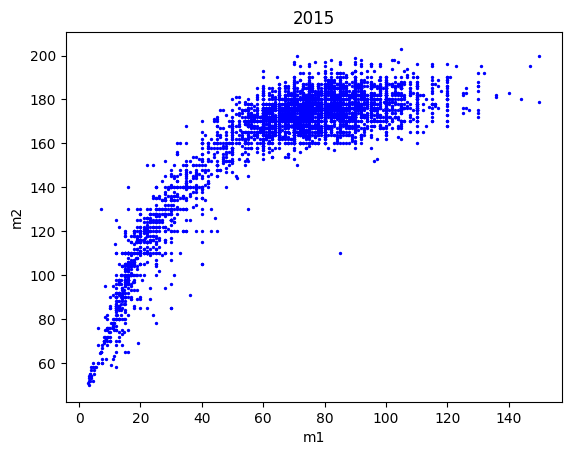

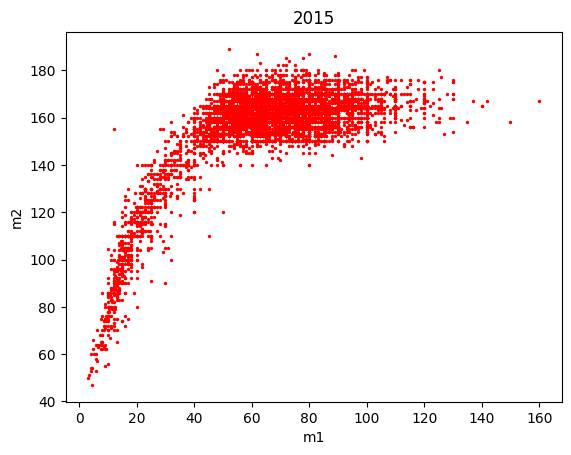

In [200]:
year=2015

corrected_df[year][['m1','m2']][corrected_df[year]['h5']=='МУЖСКОЙ'].replace(no_ans).dropna().astype(float).plot(x='m1',y='m2',kind="scatter",title=str(year),c='b',s=2)
corrected_df[year][['m1','m2']][corrected_df[year]['h5']=='ЖЕНСКИЙ'].replace(no_ans).dropna().astype(float).plot(x='m1',y='m2',kind="scatter",title=str(year),c='r',s=2)

In [190]:
corrected_df[year][['m1','m2']][corrected_df[year]['h5']=='МУЖСКОЙ']

,m1,m2
5,60.0,165.0
9,80.0,165.0
10,75.0,170.0
12,82.0,174.0
16,63.0,164.0
...,...,...
16854,23.0,120.0
16856,120.0,182.0
16857,74.0,175.0
16858,75.0,182.0


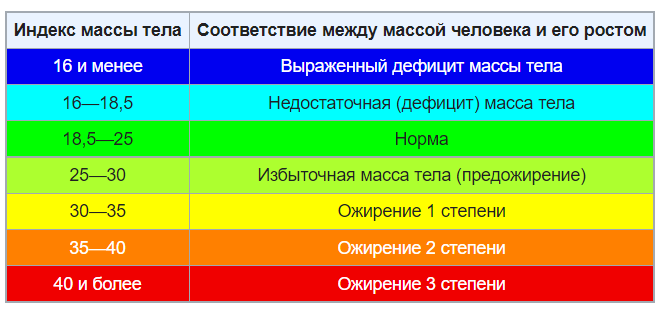

In [48]:
corrected_df[2000]['IMT']=corrected_df[2000]['m1'].replace(no_ans).astype(float)/(corrected_df[2000]['m2'].replace(no_ans).astype(float)/100)**2
corrected_df[2000]['IMT']

0       18.590125
1       20.675803
2       25.282570
3       20.195578
4       28.888889
          ...    
9004    22.656250
9005    12.817383
9006    21.461937
9007    20.829995
9008    29.372397
Name: IMT, Length: 9009, dtype: float64

### ``m3``- самооценка здоровья

In [314]:
zd_cats={'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':np.nan,
    'НЕТ ОТВЕТА':np.nan,
    'ОТКАЗ ОТ ОТВЕТА':np.nan,
    'Очень хорошее':2,
    'Плохое':-1,
    'Совсем плохое':-2,
    'Среднее, не хорошее, но и не плохое':0,
    'Хорошее':1,
    'Среднее, не хорошее и не плохое':0,
    'Cовcем плохое':-2,
    'Cреднее, не хорошее, но и не плохое':0,
    'ЗAТРУДНЯЮCЬ ОТВЕТИТЬ':np.nan,
    'НЕТ ОТВЕТA':np.nan,
    'ОТКAЗ ОТ ОТВЕТA':np.nan
   }

In [332]:
year=2010

corrected_df[year]['m3'].replace(zd_cats)

0        1
1        0
2        0
3        0
4        0
        ..
16862    0
16863    0
16864    2
16865   -1
16866   -1
Name: m3, Length: 16867, dtype: category
Categories (5, int64): [2, -1, -2, 0, 1]

### ``age`` - возраст

In [352]:
corrected_df[2002]['age']

0       29.0
1       31.0
2       47.0
3       18.0
4       16.0
        ... 
9204    50.0
9205    19.0
9206    61.0
9207     2.0
9208    41.0
Name: age, Length: 9209, dtype: category
Categories (97, object): [0.0, 1.0, 2.0, 3.0, ..., 94.0, 97.0, 98.0, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ']

### ``h5`` - пол

Даны разные имена для разных лет

In [375]:
sex_cats={
    'ЖЕНСКИЙ':'Женский',
    'МУЖСКОЙ':'Мужской'
}

In [374]:
corrected_df[2000]['h5']

0       Женский
1       Мужской
2       Женский
3       Женский
4       Мужской
         ...   
9004    Женский
9005    Женский
9006    Мужской
9007    Женский
9008    Женский
Name: h5, Length: 9009, dtype: category
Categories (2, object): ['Женский', 'Мужской']

## Работа с парами лет (спаривание)

In [49]:
pairs_of_years=[(i,i+1) for i in list(xxxx.keys()) if i+1 in list(xxxx.keys())]
pairs_of_years

[(1994, 1995),
 (1995, 1996),
 (2000, 2001),
 (2001, 2002),
 (2002, 2003),
 (2003, 2004),
 (2004, 2005),
 (2005, 2006),
 (2006, 2007),
 (2007, 2008),
 (2008, 2009),
 (2009, 2010),
 (2010, 2011),
 (2011, 2012),
 (2012, 2013),
 (2013, 2014),
 (2014, 2015),
 (2015, 2016),
 (2016, 2017),
 (2017, 2018),
 (2018, 2019),
 (2019, 2020),
 (2020, 2021)]

## Описательные статистики выборки RLMS_HSE

<AxesSubplot: title={'center': 'Cut types'}, ylabel='marst'>

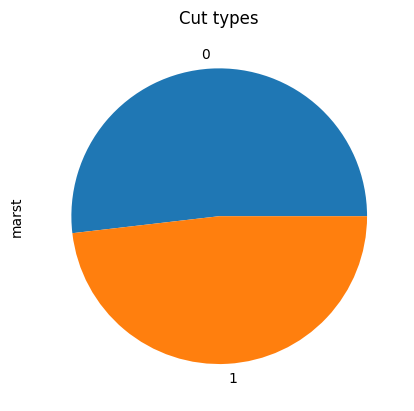

In [75]:
corrected_df[2005]['marst'].replace(marst_cats).dropna().value_counts().plot(kind="pie",title="Cut types")

In [78]:
pd.DataFrame(corrected_df[2005]['marst'].replace(marst_cats).dropna().value_counts())

,marst
0,3756
1,3490


## Получение рабочей матрицы

In [544]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import logit, probit

In [237]:
corrected_df[year]['age']

0       27.0
1       29.0
2       45.0
3       16.0
4       14.0
        ... 
9004    25.0
9005     7.0
9006    44.0
9007    22.0
9008    38.0
Name: age, Length: 9009, dtype: category
Categories (100, float64): [0.0, 1.0, 2.0, 3.0, ..., 96.0, 97.0, 98.0, 100.0]

In [466]:
pairs_of_years[0]

(1994, 1995)

In [474]:
MARRIAGE_DF={}
for year in list(pairs_of_years):
    marriage_df=corrected_df[year[0]].join(corrected_df[year[1]],on='idind',lsuffix='_after')

    marriage_df['marst']=marriage_df['marst'].replace(marst_cats).astype(float)
    marriage_df['marst_after']=marriage_df['marst_after'].replace(marst_cats).astype(float)
    marriage_df['IMT']=marriage_df['m1'].replace(no_ans).astype(float)/(marriage_df['m2'].replace(no_ans).astype(float)/100)**2
    marriage_df['diplom']=marriage_df['diplom'].replace(diplom_cats).astype(float)
    marriage_df['age']=marriage_df['age'].replace(no_ans).astype(float)
    marriage_df['popul']=marriage_df['popul'].astype(float)
    marriage_df['salary']=marriage_df['j10'].replace(no_ans).astype(float)+1
    marriage_df['health']=marriage_df['m3'].replace(zd_cats).astype(float)
    marriage_df['sex']=marriage_df['h5'].replace(sex_cats)

    marriage_df=marriage_df[['marst','marst_after','IMT','diplom','sex','age','popul','salary','health']][marriage_df['marst']==0].dropna()
    MARRIAGE_DF[year[0]]=marriage_df

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriage_df['IMT']=marriage_df['m1'].replace(no_ans).astype(float)/(marriage_df['m2'].replace(no_ans).astype(float)/100)**2
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriage_df['salary']=marriage_df['j10'].replace(no_ans).astype(float)+1
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:12: PerformanceWarning: DataFrame is highly fragm

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriage_df['IMT']=marriage_df['m1'].replace(no_ans).astype(float)/(marriage_df['m2'].replace(no_ans).astype(float)/100)**2
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriage_df['salary']=marriage_df['j10'].replace(no_ans).astype(float)+1
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:12: PerformanceWarning: DataFrame is highly fragm

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriage_df['IMT']=marriage_df['m1'].replace(no_ans).astype(float)/(marriage_df['m2'].replace(no_ans).astype(float)/100)**2
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriage_df['salary']=marriage_df['j10'].replace(no_ans).astype(float)+1
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\965708770.py:12: PerformanceWarning: DataFrame is highly fragm

In [486]:
MARRIAGE_LOGIT={}
for year in MARRIAGE_DF.keys():
    MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
                         'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
                         'м+ж': logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['age']<50]).fit()}

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[ye

Optimization terminated successfully.
         Current function value: 0.588503
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601716
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611301
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.641832
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.672553
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671613
         Iterations 4


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[ye

Optimization terminated successfully.
         Current function value: 0.650577
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.668239
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680034
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.660031
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.674225
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686592
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.662003
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686770
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682392
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677680
  

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[ye

Optimization terminated successfully.
         Current function value: 0.671868
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682481
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680065
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.667741
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.685894
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664257
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.682180
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683536
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677797
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.685705
  

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[ye

Optimization terminated successfully.
         Current function value: 0.689734
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675730
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689215
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631153
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.687324
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677634
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685293
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680715
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688521
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.649946
  

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[ye

Optimization terminated successfully.
         Current function value: 0.677188
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680057
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678434
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.644423
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673676
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658644
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.652281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677784
         Iterations 4


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[ye

Optimization terminated successfully.
         Current function value: 0.666791
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.637326
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.659203
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616247
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.647554
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654505
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643115
         Iterations 5


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][

Optimization terminated successfully.
         Current function value: 0.644467
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656570
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.644958
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.671559
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686262
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658392
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.622448
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.677932
         Iterations 4


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3652774599.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[ye

In [561]:
marriage_df=corrected_df[year[0]].join(corrected_df[year[1]],on='idind',lsuffix='_after')

    marriage_df['marst']=marriage_df['marst'].replace(marst_cats).astype(float)
    marriage_df['marst_after']=marriage_df['marst_after'].replace(marst_cats).astype(float)
    marriage_df['IMT']=marriage_df['m1'].replace(no_ans).astype(float)/(marriage_df['m2'].replace(no_ans).astype(float)/100)**2
    marriage_df['diplom']=marriage_df['diplom'].replace(diplom_cats).astype(float)
    marriage_df['age']=marriage_df['age'].replace(no_ans).astype(float)
    marriage_df['popul']=marriage_df['popul'].astype(float)
    marriage_df['salary']=marriage_df['j10'].replace(no_ans).astype(float)+1
    marriage_df['health']=marriage_df['m3'].replace(zd_cats).astype(float)
    marriage_df['sex']=marriage_df['h5'].replace(sex_cats)

    marriage_df=marriage_df[['marst','marst_after','IMT','diplom','sex','age','popul','salary','health']][marriage_df['marst']==0].dropna()
    MARRIAGE_DF[year[0]]=marriage_df

year=2015
xxxx=logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit()
print(xxxx.summary())

xxxx=logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit()
print(xxxx.summary())

Optimization terminated successfully.
         Current function value: 0.658644
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            marst_after   No. Observations:                   99
Model:                          Logit   Df Residuals:                       92
Method:                           MLE   Df Model:                            6
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                 0.04407
Time:                        07:51:26   Log-Likelihood:                -65.206
converged:                       True   LL-Null:                       -68.212
Covariance Type:            nonrobust   LLR p-value:                    0.4218
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4800      6.006      0.413      0.680      -9.292      14.252
np.log(IMT)      

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\2339898482.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xxxx=logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit()
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\2339898482.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xxxx=logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit()


In [ ]:
MARRIAGE_LOGIT={}
for year in MARRIAGE_DF.keys():
    MARRIAGE_LOGIT[year]={'м':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
                         'ж':logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
                         'м+ж': logit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['age']<50]).fit()}

In [546]:
MARRIAGE_PROBIT={}
for year in MARRIAGE_DF.keys():
    MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
                         'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
                         'м+ж': probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['age']<50]).fit()}

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),


Optimization terminated successfully.
         Current function value: 0.589612
         Iterations 5


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женски

Optimization terminated successfully.
         Current function value: 0.601839
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.611287
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.641862
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672488
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671671
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.650499
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.668221
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680025
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.660042
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674168
  

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_

Optimization terminated successfully.
         Current function value: 0.677685
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685710
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683482
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689732
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.675724
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.689212
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.631231
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.687324
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677645
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685307
  

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женски

Optimization terminated successfully.
         Current function value: 0.649560
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673557
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685813
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680728
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.685482
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.687839
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684082
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677335
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683854
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.643349
  

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женски

Optimization terminated successfully.
         Current function value: 0.673633
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658807
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652047
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677849
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.666811
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.637181
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.659211
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.615873
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.647311
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654318
  

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_

Optimization terminated successfully.
         Current function value: 0.686262
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.658516
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.622858
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677946
         Iterations 4


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MARRIAGE_PROBIT[year]={'м':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health", MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Мужской'][MARRIAGE_DF[year]['age']<50]).fit(),
C:\Users\79618\AppData\Local\Temp\ipykernel_12340\3020569051.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'ж':probit("marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",MARRIAGE_DF[year][MARRIAGE_DF[year]['sex']=='Женский'][MARRIAGE_DF[year]['age']<50]).fit(),


In [548]:
ttt=pd.concat([MARRIAGE_PROBIT[year]['ж'].params for year in MARRIAGE_PROBIT.keys()],axis=1)
ttt.columns=MARRIAGE_PROBIT.keys()
ttt.transpose()

,Intercept,np.log(IMT),np.log(diplom),np.log(age),np.log(popul),np.log(salary),health
1994,5.101892,-0.212558,-0.262560,-0.161175,-0.070770,-0.151914,0.240885
1995,-3.014021,0.435904,-0.232336,0.629297,-0.006259,0.015636,0.049491
2000,-0.924608,0.945465,-0.386625,-0.533170,0.071308,-0.022089,0.182141
2001,0.471416,0.111200,0.223759,0.019952,-0.050106,-0.124094,0.229387
2002,-1.078659,0.000034,0.135609,0.339687,-0.022318,-0.015858,-0.033509
2003,1.788096,0.114039,-0.553559,0.241236,0.039644,-0.272013,0.106378
2004,2.489675,0.443587,-0.612697,-0.862215,-0.016109,0.092492,0.182150
2005,0.417790,-0.287046,-0.472213,0.026787,0.022653,0.151361,-0.202867
2006,-0.193217,-0.136766,0.382768,0.241414,0.024686,-0.164627,0.111405
2007,0.334850,-0.502560,-0.016204,0.265812,0.001639,0.042504,-0.336436


In [550]:
ttt=pd.concat([MARRIAGE_PROBIT[year]['ж']['p_values'] for year in MARRIAGE_PROBIT.keys()],axis=1)
ttt.columns=MARRIAGE_PROBIT.keys()
ttt.transpose()

TypeError: 'BinaryResultsWrapper' object is not subscriptable

In [493]:
MARRIAGE_PARAMS={}
for year in MARRIAGE_LOGIT.keys():
    MARRIAGE_PARAMS[year]['м']['par']=MARRIAGE_LOGIT[year]['м'].params
    MARRIAGE_PARAMS[year]['м']['p_values']=MARRIAGE_LOGIT[year]['м'].pvalues
    MARRIAGE_PARAMS[year]['ж']['par']=MARRIAGE_LOGIT[year]['ж'].params
    MARRIAGE_PARAMS[year]['ж']['p_values']=MARRIAGE_LOGIT[year]['ж'].pvalues
    MARRIAGE_PARAMS[year]['м+ж']['par']=MARRIAGE_LOGIT[year]['м+ж'].params
    MARRIAGE_PARAMS[year]['м+ж']['p_values']=MARRIAGE_LOGIT[year]['м+ж'].pvalues


KeyError: 1994

In [507]:
cccc=pd.concat([MARRIAGE_LOGIT[year]['м'].params,MARRIAGE_LOGIT[year]['м'].pvalues],axis=1)
cccc.columns=['params','p_values']
cccc

,params,p_values
Intercept,-9.138987,0.079275
np.log(IMT),2.816760,0.078122
np.log(diplom),-0.682348,0.447168
np.log(age),0.177365,0.799073
np.log(popul),-0.112414,0.122981
np.log(salary),0.275587,0.170331
health,0.002522,0.992609


In [534]:
ttt=pd.concat([MARRIAGE_LOGIT[year]['ж'].params for year in MARRIAGE_LOGIT.keys()],axis=1)
ttt.columns=MARRIAGE_LOGIT.keys()

In [535]:
ttt.transpose()

,Intercept,np.log(IMT),np.log(diplom),np.log(age),np.log(popul),np.log(salary),health
1994,8.452899,-0.364614,-0.455225,-0.247228,-0.117544,-0.250967,0.408105
1995,-4.815342,0.691228,-0.365388,1.006667,-0.010995,0.025787,0.082763
2000,-1.506027,1.522047,-0.629803,-0.854015,0.115044,-0.033423,0.294439
2001,0.762618,0.181031,0.356663,0.027961,-0.080161,-0.198690,0.367127
2002,-1.719654,-0.003184,0.217622,0.543958,-0.035713,-0.025166,-0.054706
2003,2.887957,0.186496,-0.883929,0.384015,0.062766,-0.438642,0.167902
2004,3.999596,0.707507,-0.989377,-1.382233,-0.024708,0.148903,0.291602
2005,0.639228,-0.454460,-0.750551,0.042876,0.035879,0.242724,-0.320726
2006,-0.331814,-0.215386,0.616359,0.386053,0.039740,-0.263345,0.178247
2007,0.570497,-0.810169,-0.032506,0.424552,0.003180,0.067531,-0.539814


In [551]:
ttt=pd.concat([MARRIAGE_PROBIT[year]['ж'].pvalues for year in MARRIAGE_PROBIT.keys()],axis=1)
ttt.columns=MARRIAGE_PROBIT.keys()
ttt.transpose()[ttt.transpose()<0.1]

,Intercept,np.log(IMT),np.log(diplom),np.log(age),np.log(popul),np.log(salary),health
1994,0.010336,NaN,NaN,NaN,0.048518,NaN,0.062330
1995,NaN,NaN,NaN,0.079913,NaN,NaN,NaN
2000,NaN,0.066618,NaN,NaN,0.031703,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,0.029495,NaN
2004,NaN,NaN,NaN,0.039957,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,0.040348


In [537]:
ttt=pd.concat([MARRIAGE_LOGIT[year]['ж'].pvalues for year in MARRIAGE_LOGIT.keys()],axis=1)
ttt.columns=MARRIAGE_LOGIT.keys()

In [538]:
ttt.transpose()[ttt.transpose()<0.1]

,Intercept,np.log(IMT),np.log(diplom),np.log(age),np.log(popul),np.log(salary),health
1994,0.011068,NaN,NaN,NaN,0.053082,NaN,0.058374
1995,NaN,NaN,NaN,0.082219,NaN,NaN,NaN
2000,NaN,0.067782,NaN,NaN,0.032543,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,0.031935,NaN
2004,NaN,NaN,NaN,0.041463,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,0.041587


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

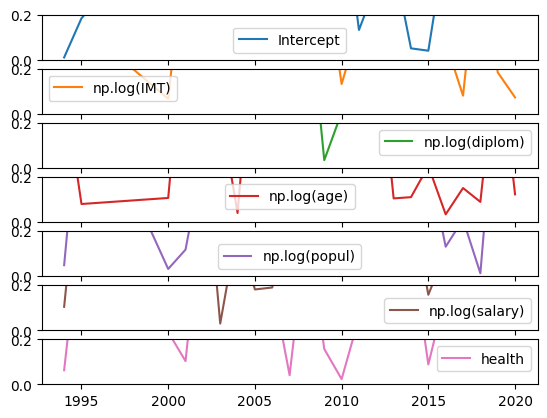

In [552]:
ttt.transpose().plot(subplots=True,ylim=(0,0.2))

In [539]:
ttt.transpose().mean()

Intercept         0.467239
np.log(IMT)       0.492196
np.log(diplom)    0.466493
np.log(age)       0.388997
np.log(popul)     0.479064
np.log(salary)    0.499881
health            0.426715
dtype: float64

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

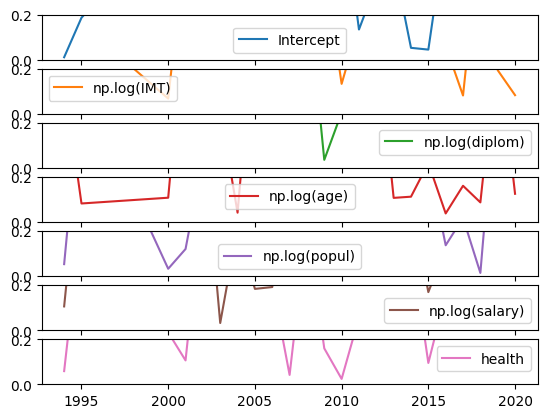

In [531]:
ttt.transpose().plot(subplots=True,ylim=(0,0.2))

In [540]:
ttt=pd.concat([MARRIAGE_LOGIT[year]['м'].pvalues for year in MARRIAGE_LOGIT.keys()],axis=1)
ttt.columns=MARRIAGE_LOGIT.keys()

In [541]:
ttt.transpose()[ttt.transpose()<0.1]

,Intercept,np.log(IMT),np.log(diplom),np.log(age),np.log(popul),np.log(salary),health
1994,0.079275,0.078122,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,0.033207,NaN,NaN,NaN,NaN,NaN
2002,0.098723,0.058806,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [542]:
ttt.transpose().mean()

Intercept         0.577948
np.log(IMT)       0.429423
np.log(diplom)    0.532385
np.log(age)       0.570840
np.log(popul)     0.492997
np.log(salary)    0.497890
health            0.513614
dtype: float64

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

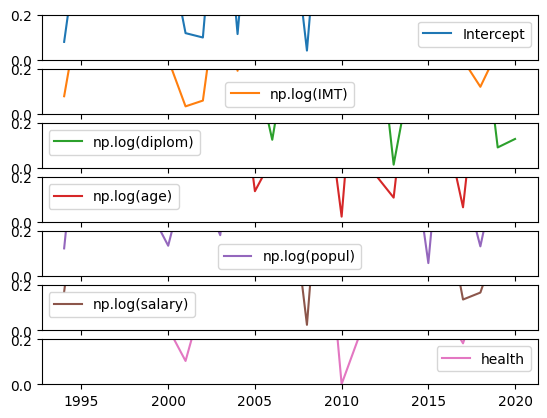

In [543]:
ttt.transpose().plot(subplots=True,ylim=(0,0.2))

In [511]:
ttt=pd.concat([MARRIAGE_LOGIT[year]['м'].params for year in MARRIAGE_LOGIT.keys()],axis=1)
ttt.columns=MARRIAGE_LOGIT.keys()

In [516]:
ttt.transpose()

,Intercept,np.log(IMT),np.log(diplom),np.log(age),np.log(popul),np.log(salary),health
1994,-9.138987,2.816760,-0.682348,0.177365,-0.112414,0.275587,0.002522
1995,2.476477,-1.006877,-0.055813,0.217664,-0.013061,0.062369,0.118679
2000,-2.796538,1.425070,-0.302377,0.004305,-0.116851,0.144289,-0.343345
2001,6.856245,-2.419020,0.662040,-0.170113,-0.047836,0.094203,-0.440099
2002,-6.952034,2.355336,-0.185674,0.494939,-0.054342,-0.103491,-0.257093
2003,-0.058210,-0.543339,0.933234,0.025578,0.083859,-0.195263,0.234644
2004,-6.563564,1.521757,0.675490,-0.191297,0.017207,0.096708,-0.199228
2005,0.019754,0.290760,-0.525611,0.918359,-0.034115,-0.264030,-0.343297
2006,-1.080325,-0.576511,1.182317,0.702034,0.031539,-0.297866,0.086010
2007,-1.476271,0.752952,0.343561,-0.114035,-0.035235,-0.103437,0.079906


In [494]:
MARRIAGE_LOGIT[1994]['м'].params

Intercept        -9.138987
np.log(IMT)       2.816760
np.log(diplom)   -0.682348
np.log(age)       0.177365
np.log(popul)    -0.112414
np.log(salary)    0.275587
health            0.002522
dtype: float64

In [484]:
MARRIAGE_DF[2018].sex

3       Женский
11      Мужской
34      Женский
35      Мужской
40      Мужской
         ...   
1467    Мужской
1471    Женский
1475    Женский
1478    Женский
1481    Мужской
Name: sex, Length: 243, dtype: category
Categories (2, object): ['Женский', 'Мужской']

In [421]:
year=2013
marriage_df=corrected_df[year].join(corrected_df[year+1],on='idind',lsuffix='_after')

marriage_df['marst']=marriage_df['marst'].replace(marst_cats).astype(float)
marriage_df['marst_after']=marriage_df['marst_after'].replace(marst_cats).astype(float)
marriage_df['IMT']=marriage_df['m1'].replace(no_ans).astype(float)/(marriage_df['m2'].replace(no_ans).astype(float)/100)**2
marriage_df['diplom']=marriage_df['diplom'].replace(diplom_cats).astype(float)
marriage_df['age']=marriage_df['age'].replace(no_ans).astype(float)
marriage_df['popul']=marriage_df['popul'].astype(float)
marriage_df['j10']=marriage_df['j10'].replace(no_ans).astype(float)+1
marriage_df['m3']=marriage_df['m3'].replace(zd_cats).astype(float)
marriage_df['h5']=marriage_df['h5'].replace(sex_cats)

marriage_df=marriage_df[['marst','marst_after','IMT','diplom','h5','age','popul','j10','m3']][marriage_df['marst']==0].dropna()

C:\Users\79618\AppData\Local\Temp\ipykernel_12340\262293336.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriage_df['IMT']=marriage_df['m1'].replace(no_ans).astype(float)/(marriage_df['m2'].replace(no_ans).astype(float)/100)**2


In [422]:
marriage_df=marriage_df[['marst','marst_after','IMT','diplom','h5','age','popul','j10','m3']][marriage_df['marst']==0].dropna()
marriage_df

,marst,marst_after,IMT,diplom,h5,age,popul,j10,m3
1,0.0,1.0,32.881402,10.0,Женский,61.0,2400.0,13001.0,0.0
2,0.0,1.0,29.054752,11.0,Женский,62.0,100.0,15001.0,0.0
6,0.0,1.0,24.092971,10.0,Женский,51.0,95900.0,12001.0,0.0
12,0.0,1.0,37.109375,16.0,Женский,25.0,95900.0,15801.0,0.0
16,0.0,0.0,32.283058,11.0,Мужской,50.0,95900.0,7001.0,1.0
...,...,...,...,...,...,...,...,...,...
2279,0.0,1.0,29.069767,11.0,Мужской,29.0,111800.0,35001.0,0.0
2287,0.0,0.0,21.007668,16.0,Женский,32.0,11503500.0,50001.0,1.0
2290,0.0,0.0,27.114822,16.0,Мужской,32.0,11300.0,100001.0,1.0
2292,0.0,0.0,21.453574,16.0,Женский,28.0,110400.0,35001.0,1.0


In [452]:
marriage_mod = logit(
    "marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(j10)+C(m3)",
    marriage_df[marriage_df['h5']=='Женский'][marriage_df['age']<50]).fit()

Optimization terminated successfully.
         Current function value: 0.673217
         Iterations 5


C:\Users\79618\AppData\Local\Temp\ipykernel_12340\164373160.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marriage_df[marriage_df['h5']=='Женский'][marriage_df['age']<50]).fit()


In [453]:
print(marriage_mod.summary())

                           Logit Regression Results                           
Dep. Variable:            marst_after   No. Observations:                  147
Model:                          Logit   Df Residuals:                      138
Method:                           MLE   Df Model:                            8
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                 0.02794
Time:                        00:07:28   Log-Likelihood:                -98.963
converged:                       True   LL-Null:                       -101.81
Covariance Type:            nonrobust   LLR p-value:                    0.6820
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9199      4.745      0.826      0.409      -5.381      13.221
C(m3)[T.0.0]      -0.0719      1.104     -0.065      0.948      -2.236       2.092
C(m3)[T.1.0]       0.2364      1.113

In [460]:
print(marriage_mod.summary())

                           Logit Regression Results                           
Dep. Variable:            marst_after   No. Observations:                  113
Model:                          Logit   Df Residuals:                      106
Method:                           MLE   Df Model:                            6
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                 0.07117
Time:                        01:06:41   Log-Likelihood:                -72.747
converged:                       True   LL-Null:                       -78.321
Covariance Type:            nonrobust   LLR p-value:                   0.08392
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3717      5.467      0.434      0.664      -8.343      13.087
np.log(IMT)       -1.4319      1.371     -1.044      0.296      -4.120       1.256
np.log(diplom)     2.5654      1.050

In [448]:
marriage_mod = logit(
    "marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(j10)+C(m3)",
    marriage_df[marriage_df['age']<50]).fit()

Optimization terminated successfully.
         Current function value: 0.674725
         Iterations 4


In [457]:
marriage_mod.pvalues

Intercept         0.408786
C(m3)[T.0.0]      0.948046
C(m3)[T.1.0]      0.831894
C(m3)[T.2.0]      0.682253
np.log(IMT)       0.666555
np.log(diplom)    0.431822
np.log(age)       0.092453
np.log(popul)     0.541118
np.log(j10)       0.968465
dtype: float64

In [458]:
marriage_mod.params

Intercept         3.919879
C(m3)[T.0.0]     -0.071943
C(m3)[T.1.0]      0.236357
C(m3)[T.2.0]     -0.599599
np.log(IMT)       0.403276
np.log(diplom)   -0.658490
np.log(age)      -1.216199
np.log(popul)     0.047080
np.log(j10)       0.014833
dtype: float64

In [456]:
dir(marriage_mod)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_endog_name',
 '_get_robustcov_results',
 '_use_t',
 'aic',
 'bic',
 'bse',
 'conf_int',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'f_test',
 'fittedvalues',
 'get_margeff',
 'initialize',
 'k_constant',
 'llf',
 'llnull',
 'llr',
 'llr_pvalue',
 'load',
 'mle_retvals',
 'mle_settings',
 'model',
 'nobs',
 'normalized_cov_params',
 'params',
 'pred_table',
 'predict',
 'prsquared',
 'pvalues',
 'remove_data',
 'resid_dev',
 'resid_generalized',
 'resid_pearson',
 'resid_response',
 'save',
 'scale',
 'set_null_options',
 'summary'

In [289]:
mfx = affair_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:          married_after
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0003      0.001     -0.468      0.640      -0.001       0.001
popul       6.107e-09   4.37e-09      1.398      0.162   -2.46e-09    1.47e-08


## Модель на всей панели

In [588]:
marriage_df11=pd.concat([MARRIAGE_DF[year] for year in MARRIAGE_DF.keys()])

In [612]:
marriage_df11=pd.concat([MARRIAGE_DF[year] for year in MARRIAGE_DF.keys() if year>1999])

In [613]:
marriage_df11[(marriage_df11['sex']=='Женский') & (marriage_df11['age']<50)]

,marst,marst_after,IMT,diplom,sex,age,popul,salary,health
1,0.0,1.0,25.593737,11.0,Женский,46.0,10800.0,2501.0,0.0
50,0.0,0.0,33.057851,11.0,Женский,49.0,100.0,2801.0,0.0
63,0.0,1.0,25.180785,11.0,Женский,36.0,753400.0,2401.0,0.0
106,0.0,1.0,17.908855,10.0,Женский,20.0,753400.0,651.0,0.0
107,0.0,1.0,19.777699,10.0,Женский,19.0,753400.0,391.0,1.0
...,...,...,...,...,...,...,...,...,...
1280,0.0,0.0,20.964361,11.0,Женский,37.0,38000.0,36001.0,1.0
1311,0.0,1.0,20.957171,10.0,Женский,32.0,49700.0,23001.0,1.0
1328,0.0,0.0,22.857143,16.0,Женский,47.0,5398100.0,19001.0,1.0
1340,0.0,1.0,21.258503,16.0,Женский,34.0,12348300.0,50001.0,1.0


In [614]:
marriage_df11[marriage_df11['age']<50]

,marst,marst_after,IMT,diplom,sex,age,popul,salary,health
1,0.0,1.0,25.593737,11.0,Женский,46.0,10800.0,2501.0,0.0
50,0.0,0.0,33.057851,11.0,Женский,49.0,100.0,2801.0,0.0
63,0.0,1.0,25.180785,11.0,Женский,36.0,753400.0,2401.0,0.0
77,0.0,1.0,17.916331,11.0,Мужской,15.0,753400.0,2201.0,2.0
104,0.0,0.0,15.605006,16.0,Мужской,23.0,753400.0,451.0,0.0
...,...,...,...,...,...,...,...,...,...
1328,0.0,0.0,22.857143,16.0,Женский,47.0,5398100.0,19001.0,1.0
1340,0.0,1.0,21.258503,16.0,Женский,34.0,12348300.0,50001.0,1.0
1347,0.0,1.0,31.561672,10.0,Мужской,44.0,12348300.0,10001.0,0.0
1350,0.0,0.0,21.513859,16.0,Женский,37.0,1800.0,50001.0,1.0


In [615]:
marriage_mod1 = logit(
    "marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",
   marriage_df11[(marriage_df11['sex']=='Женский') & (marriage_df11['age']<50)]).fit()
print(marriage_mod1.summary())

Optimization terminated successfully.
         Current function value: 0.692782
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:            marst_after   No. Observations:                 3822
Model:                          Logit   Df Residuals:                     3815
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:               0.0002567
Time:                        04:24:19   Log-Likelihood:                -2647.8
converged:                       True   LL-Null:                       -2648.5
Covariance Type:            nonrobust   LLR p-value:                    0.9683
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4826      0.709      0.681      0.496      -0.907       1.872
np.log(IMT)      

In [616]:
marriage_mod1 = logit(
    "marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",
    marriage_df11[(marriage_df11['sex']=='Мужской') & (marriage_df11['age']<50)]).fit()
print(marriage_mod1.summary())

Optimization terminated successfully.
         Current function value: 0.690845
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            marst_after   No. Observations:                 2815
Model:                          Logit   Df Residuals:                     2808
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                0.003314
Time:                        04:24:26   Log-Likelihood:                -1944.7
converged:                       True   LL-Null:                       -1951.2
Covariance Type:            nonrobust   LLR p-value:                   0.04415
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1460      0.937     -0.156      0.876      -1.983       1.691
np.log(IMT)      

In [617]:
marriage_mod1 = logit(
    "marst_after ~ np.log(IMT)+np.log(diplom)+np.log(age)+np.log(popul)+np.log(salary)+health",
    marriage_df11[(marriage_df11['age']<50)]).fit()
print(marriage_mod1.summary())

Optimization terminated successfully.
         Current function value: 0.692602
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:            marst_after   No. Observations:                 6637
Model:                          Logit   Df Residuals:                     6630
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:               0.0007178
Time:                        04:24:31   Log-Likelihood:                -4596.8
converged:                       True   LL-Null:                       -4600.1
Covariance Type:            nonrobust   LLR p-value:                    0.3590
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2867      0.556      0.515      0.606      -0.803       1.377
np.log(IMT)      

In [586]:
len(MARRIAGE_DF[1994])+len(MARRIAGE_DF[1995])

909

In [580]:
[len(MARRIAGE_DF[year].index) for year in waves_dict.keys()]

KeyError: 1996

## Теория статистической оценки с биномиальной объясняемой переменной 

Рассмотрим теперь модели, в которых зависимая переменная принимает только два значения, т.е. является фиктивной переменной

В биномиальную модель входит изучаемая переменная $x$, принимающая два
значения, а также объясняющие переменные $z$, которые содержат факторы, определяющие выбор одного из значений. Без потери общности будем предполагать, что $x$ принимает значения $0$ и $1$.

Пусть на основе имеющихся наблюдений мы оценили регрессию: $x=z\alpha + \epsilon$. Однако эта модель будет предсказывать абсурдные значения объясняемой переменной $x$, т.е. меньше нуля, больше нуля и дробные. 

С более формальной точки зрения данная модель не может быть корректна, т.к. у биномииальной зависимой переменной будет распределение Бернулли, то есть оно полностью задается вероятностью получения единицы. 

$E(x)=P(x=1)*1 +P(x=0)*1=P(x=1)$

Ожидание $x$ при данном $z$:
$E(x)=z\alpha+E(\epsilon)=z\alpha$

Таким образом, $E(x)=P(x=1)=z\alpha$, т.е. вероятность ограничена, но равна не ограниченной величине и мат. ожидание может описываться только нелиейной функцией. 

Теперь получим модель, которая принимает во внимание тот факт, что вероятность не может выходить за пределы 0 и 1, и проста в оценке

$P(x=1)=F(z\alpha)$, где $F$ - некоторая достаточно простая функция, преобразующая $z\alpha$ в число от 0 до 1. 
Естественно выбрать в качестве этой функции какую-либо дифференцируемую функцию распределенения, определенную во всей действительной прямой

Заметим, что если выбрать распределение соотсветсвующее равномерному распределению на отрезке от 0 до 1, то окажется что система:
* $E(x)=P(x=1)$=... (система)
* $0, z\alpha<=0$
* $z\alpha<=0, 0=<z\alpha<=1$
* $1, z\alpha>=1$

Но выбор равномерного распределения скорее усложняет оценку, чем ее упрощает, т.к. мат. ожидание является здесь нелинейной функцийе от ниеизвестного парвметра $\alpha$, т.е. это нелинейная регрессия, причем функция недиффернецируема. 

Линейная модель вероятности когда изучаемая зависимость слаба, и в имеющихся данных доля как нулей, так и единиц слишкмои мала. 

**Удобные для логит-оценок распределения**

(оба они симметричны относительно 0)

1. **Логистическое распределение** (**ЛОГИТ**)

$\lambda(y)=\frac{e^y}{(1+e^y)^2}$ - плотность логистического распределения

$\Lambda(y)=\frac{e^y}{(1+e^y)}=\frac{1}{1+e^{-y}}$ - функция распеределения

Модель с биномиальной зависимой переменной с логистическими респределенным отклонением называют **логит**. Для логита:

$E(x)=P(x=1)=\Lambda(z\alpha)=\frac{e^{z\alpha}}{1+e^{z\alpha}}=\frac{1}{1+e^{-z\alpha}}$

2. **Нормальное распределение** (**ПРОБИТ**)

Модель с номрально расредленным отклонением $\epsilon$ называется  **пробит**. 
При этом используется стандартное нормальное распределение, т.е. 
$E(x)=P(x=1)=\Phi(z\alpha)=\int \phi(t)dt= \frac{1}{\sqrt{2\pi}} \int e^{-t^2/2}dt$ 

Логистическое распределение похоже на нормальное с нулевым ожиданием и дисперсией $\pi^2/3$. В связи с этим оценки коэффициентов в моделяъ различаются примерно на множитель $\frac{\pi}{\sqrt{3}} \approx 1.8$

Если вероятности далеки от границ 0 И 1 (около 0.5), то более точной оценкой множителя является величина $\phi(0)/\lambda(0)=\sqrt{8/\pi} \approx 1.6$. 

При малом количестве наблюдений из=за схожести распределений сложно решить, когда следует применять логит, а когда - пробит. 

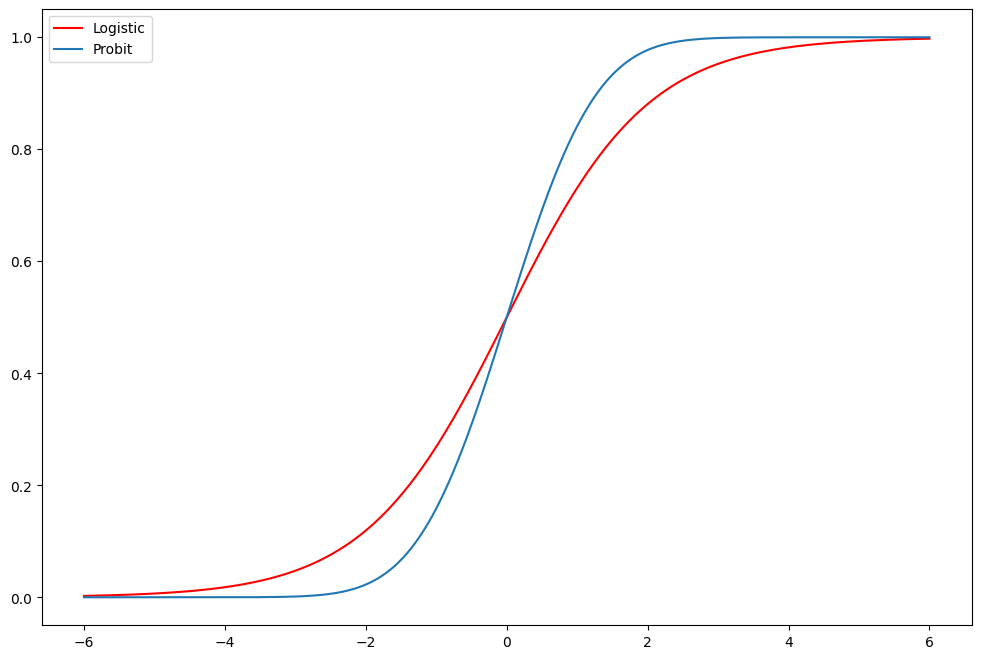

In [300]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), "r-", label="Logistic")
ax.plot(support, stats.norm.cdf(support), label="Probit")
ax.legend()

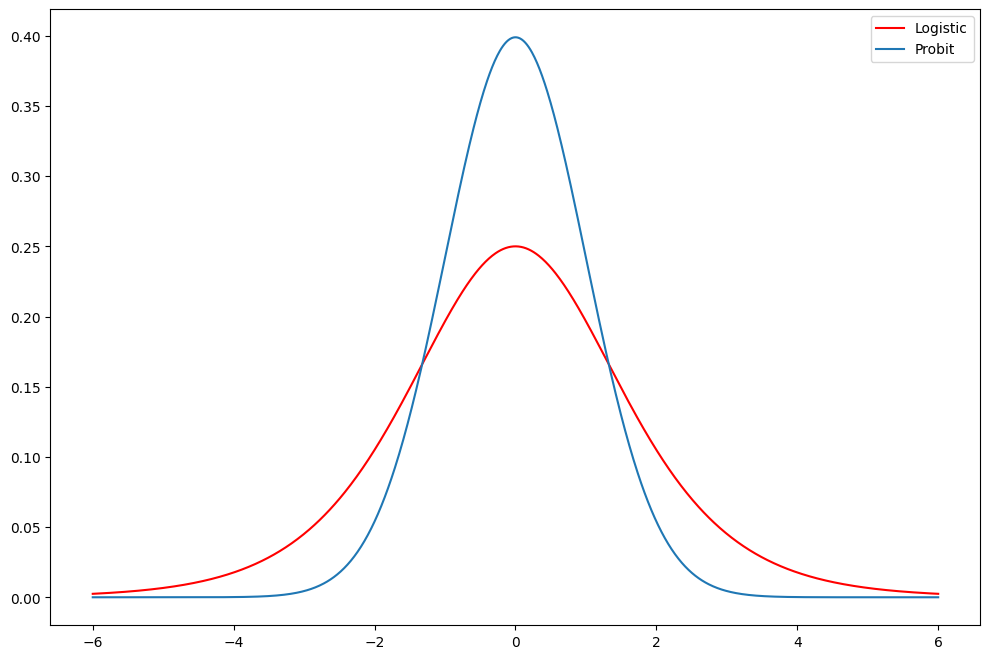

In [301]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.pdf(support), "r-", label="Logistic")
ax.plot(support, stats.norm.pdf(support), label="Probit")
ax.legend()

## Оценка логит и пробит моделей